# Chapter 15 — 15_04: Time Series & Simple Linear Regression

We reproduce the textbook’s NYC January temperature trend example using scikit-learn’s `LinearRegression`.


In [6]:
import pandas as pd

# Use the CSV you copied into your project:
# datafun-07-ml/examples/ch15/ave_hi_nyc_jan_1895-2018.csv
nyc = pd.read_csv('examples/ch15/ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)  # convert YYYYMM -> YYYY
nyc.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1),
    nyc.Temperature.values,
    random_state=11
)

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print("Coefficient (slope):", linear_regression.coef_[0])
print("Intercept:", linear_regression.intercept_)


Coefficient (slope): 0.019391673294782773
Intercept: -0.30779820252656975


In [8]:
predicted = linear_regression.predict(X_test)
expected  = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [9]:
predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_

print("Predicted 2019:", predict(2019))
print("Predicted 1890:", predict(1890))
print("Self-check 1889:", predict(1889))
print("Self-check 2020:", predict(2020))


Predicted 2019: [38.84399018]
Predicted 1890: [36.34246432]
Self-check 1889: [36.32307265]
Self-check 2020: [38.86338185]


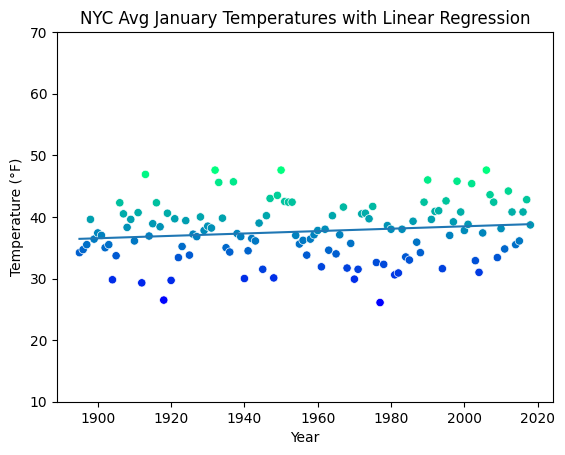

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

axes = sns.scatterplot(
    data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False
)
axes.set_ylim(10, 70)

x = np.array([nyc.Date.min(), nyc.Date.max()])
y = predict(x)

plt.plot(x, y)  # regression line
plt.title("NYC Avg January Temperatures with Linear Regression")
plt.xlabel("Year"); plt.ylabel("Temperature (°F)")
plt.show()
